## Word frequency

In [2]:
reader = open("europarl-v7.hu-en.hu", "r")
writer = open("word_freq.txt", "w")

word_list = {}
word_count_list = {}

for word in reader.read().split():
    if word not in word_list:
        word_list[word] = 1
    else:
        word_list[word] += 1
        
for word in word_list.keys():
    count = word_list[word]
    
    if count not in word_count_list:
        word_count_list[count] = [word]
        
    else:
        word_count_list[count].append(word)
        
        
for count in sorted(word_count_list, reverse = True):
    for word in sorted(word_count_list[count]):
        writer.write("{0}\t{1}\n".format(word,count))
        



reader.close()
writer.close()


## Word frequency with Counter

In [3]:
from collections import Counter


def word_freq(data): 
    word_counter = Counter()

    for word in data:
        word_counter[word] += 1
    
    return word_counter
    


## Character frequency

In [4]:
reader = open("europarl-v7.hu-en.hu", "r")
writer = open("char_freq.txt", "w")

character_list = {}
character_count_list = {}

for word in reader.read().split():
    for char in list(word):
        
        if char not in character_list:
            character_list[char] = 1
        else:
            character_list[char] += 1
            

for char in character_list.keys():
    count = character_list[char]
    
    if count not in character_count_list:
        character_count_list[count] = [char]
    else:
        character_count_list[count].append(char)
    
            
for count in sorted(character_count_list, reverse = True):
    for char in sorted(character_count_list[count]):
        writer.write("{0}\t{1}\n".format(char,count))
        

        
reader.close()
writer.close()

## Character frequency with Counter

In [5]:
def char_freq(data):
    character_counter = Counter()
    
    for word in data:
        for c in word:
            character_counter[c] += 1
    
    return character_counter

In [6]:
def char_freq_N(data):
    character_counter = Counter()

    for word in data:
        if "_NUM_" in word:
            if word == "_NUM_":
                character_counter["_NUM_"] +=1
            else:
                ws = word.split('_NUM_')
                for i in ws:
                    for c in list(i):
                        character_counter[c] += 1
        
        else:
            for char in list(word):
                if char.isdigit():
                    character_counter["_NUM_"] +=1
                else:
                    character_counter[char] += 1
            

    return character_counter

## Exercise 2

In [7]:
with open("europarl-v7.hu-en.hu" ,"r") as r:
    main_data = r.read()

In [8]:
import string
import re
def clean_text(data):
    new_data = data.lower()
    
    for c in string.punctuation:
        new_data = new_data.replace(c,"")
        
    new_data = re.sub('[\d]+','_NUM_',new_data)
        
   
    return new_data

#### Cleaning the corpus.

In [9]:
cleaned_input = clean_text(main_data)

#### Word count on cleaned corpus.

In [10]:
wc = word_freq(cleaned_input.split())

with open("cleaned_words.txt", "w") as f:
    
    for data in wc.most_common():
            f.write("{0}\t{1}\n".format(data[0],data[1]))

#### Character count on cleaned corpus.

In [11]:
cc = char_freq_N(cleaned_input.split())

with open("cleaned_chars.txt", "w") as f:
    for data in cc.most_common():
        f.write("{0}\t{1}\n".format(data[0],data[1]))

## Exercise 3

#### Filtering rare words

In [12]:
def filter_rare(input_words, rare_threshold = 5):
    rare_token = "_RARE_"
    
    with open("filtered_text.txt","w") as w:
        for line in input_words:
            for word in line.split():
                if wcx[word] <= rare_threshold:
                    w.write('_RARE_'+' ')
                else:
                    w.write(word+' ')
            w.write('\n')
            
    

In [13]:
wcx = word_freq(cleaned_input.split())

filter_rare(cleaned_input.split('\n'), 500)

In [14]:
with open("filtered_text.txt","r") as r, open("filtered_stat.txt","w") as w:
    filtered = r.read()
    fwc = word_freq(filtered.split())

    for data in fwc.most_common():
        w.write("{0}\t{1}\n".format(data[0],data[1]))


## Exercise 4

#### Dictionary coverage

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

def dict_coverage(file_name = None):
    words = cleaned_input.split()
    
    if file_name is not None:
        with open(file_name, "r") as r:
            data = r.read()
            
        clean_data = clean_text(data)
        words2 = clean_data.split()
    
    wlist = set()
    
    max_w = 10000

    results = {}
    results2 = {}

    for size in range(0,max_w,100):  
        for i in wc.most_common(size):
            wlist.add(i[0])
    
        all_words = 0
        words_in_list = 0
        words_in_list2 = 0
    
        for word in words:
            if word in wlist:
                words_in_list += 1
            all_words += 1
        
        results[size] = words_in_list / all_words * 100

        all_words = 0
        
        for word in words2:
            if word in wlist:
                words_in_list2 += 1
            all_words += 1
        
        
        results2[size] = words_in_list2 / all_words * 100

    lists = sorted(results.items())
    lists2 = sorted(results2.items())

    x, y = zip(*lists)
    x2,y2 = zip(*lists2)
    plt.plot(x, y, 'g-', linewidth=2, label='europarl-v7.hu-en.hu coverage')
    plt.plot(x2, y2, 'b-', linewidth=2, label=file_name+' coverage')
    plt.legend(loc='upper left')
    plt.axis([0,max_w,0,100])
    plt.xlabel('First x most common words')
    plt.ylabel('Coverage %')
    plt.show()

##### Coverage of Hungarian and English words

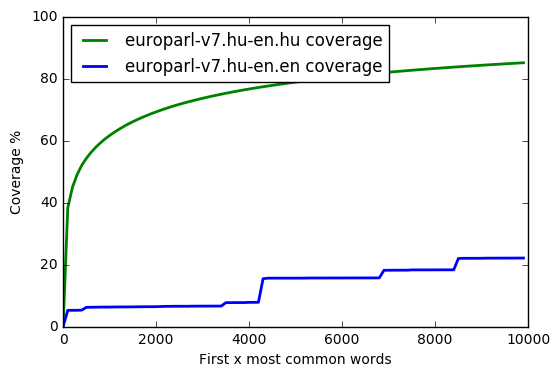

CPU times: user 4min 57s, sys: 564 ms, total: 4min 58s
Wall time: 4min 59s


In [16]:
%%time
dict_coverage("europarl-v7.hu-en.en")

## Last Exercise

##### Function that return coverage percentage

In [67]:
def dictionary_coverage(input_dict, input_corp):
    word_found = 0
    
    
    for word in input_corp:
        if word in input_dict:
            word_found += 1
    
    return word_found / len(input_corp)

In [96]:
import numpy as np

def calculate_coverages(_dict, text):
    
    common_words = set()
    results = {}
    
    text = text.split()
    
    for size in np.logspace(2,6,num = 12, dtype=np.int):
        for i in _dict.most_common(size):
            common_words.add(i[0])
        
        results[size] = dictionary_coverage(common_words, text)
        
    
    return results
        


In [90]:
with open("europarl-v7.de-en.de","r") as r1, open("europarl-v7.de-en.de", "r") as r2:
    cp1 = r1.read()
    cp2 = r2.read()
    
d = word_freq(clean_text(cp1).split())

input_cleaned_corp = clean_text(cp2)

In [98]:
%%time
calculate_coverages(d,input_cleaned_corp)

CPU times: user 33.7 s, sys: 76 ms, total: 33.8 s
Wall time: 33.8 s


{100: 0.4903490265771057,
 231: 0.5799144954165286,
 533: 0.6699531511993333,
 1232: 0.7593915077763387,
 2848: 0.8420581744430053,
 6579: 0.9076129200678735,
 15199: 0.9513657238671848,
 35111: 0.9767116680221292,
 81113: 0.9901553259636334,
 187381: 0.9971015592839142,
 432876: 1.0,
 1000000: 1.0}